# 04_model_evaluation.ipynb

This notebook:
Eevaluates Linear Regression model vs. Random Forest model
Identifies and visualizes the top 10 prediction errors from the Random Forest model.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split

# Project path setup
PROJECT_ROOT = Path.cwd().parent
MODEL_DIR = PROJECT_ROOT / "Models" / "Artifacts"
DATA_PATH = PROJECT_ROOT / "Data" / "Processed" / "feature_engineered_superstore.csv"
ARTIFACTS_DIR = PROJECT_ROOT / "Models" / "Artifacts"

print("📄 Reading data from:", DATA_PATH)

# Load dataset
df = pd.read_csv(DATA_PATH, encoding="ISO-8859-1")
X = df.drop(columns=["Sales"])
y = df["Sales"]

# Split for consistency with training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


📄 Reading data from: /Users/nastaran/DSI_Project/C6_ML5/Data/Processed/feature_engineered_superstore.csv


In [20]:
rf_model = joblib.load(MODEL_DIR / "random_forest_model.pkl")
lr_model = joblib.load(MODEL_DIR / "linear_regression_model.pkl")


In [28]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Pred_RF": y_pred_rf,
    "Pred_LR": y_pred_lr
})
results_df["Residual_RF"] = results_df["Actual"] - results_df["Pred_RF"]
results_df["Residual_LR"] = results_df["Actual"] - results_df["Pred_LR"]
results_df.head()


,Actual,Pred_RF,Pred_LR,Residual_RF,Residual_LR
0,563.808,267.958300,282.328433,295.849700,281.479567
1,36.672,34.446080,12.431855,2.225920,24.240145
2,37.300,60.352840,5.890786,-23.052840,31.409214
3,212.058,455.387082,419.419840,-243.329082,-207.361840
4,171.288,348.760465,632.538268,-177.472465,-461.250268


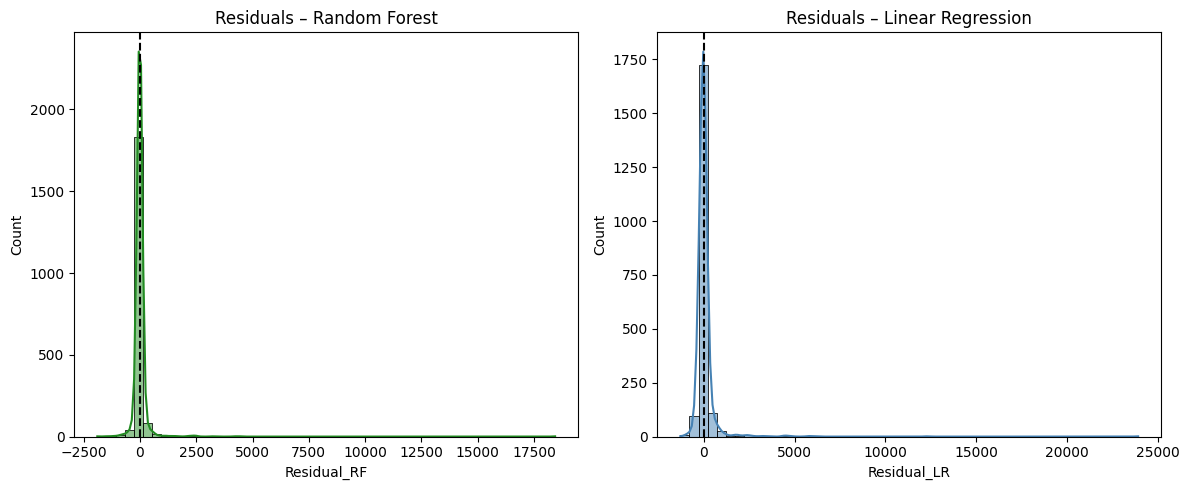

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(results_df["Residual_RF"], bins=50, kde=True, color="forestgreen")
plt.title("Residuals – Random Forest")
plt.axvline(0, color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(results_df["Residual_LR"], bins=50, kde=True, color="steelblue")
plt.title("Residuals – Linear Regression")
plt.axvline(0, color='black', linestyle='--')

plt.tight_layout()
plt.show()


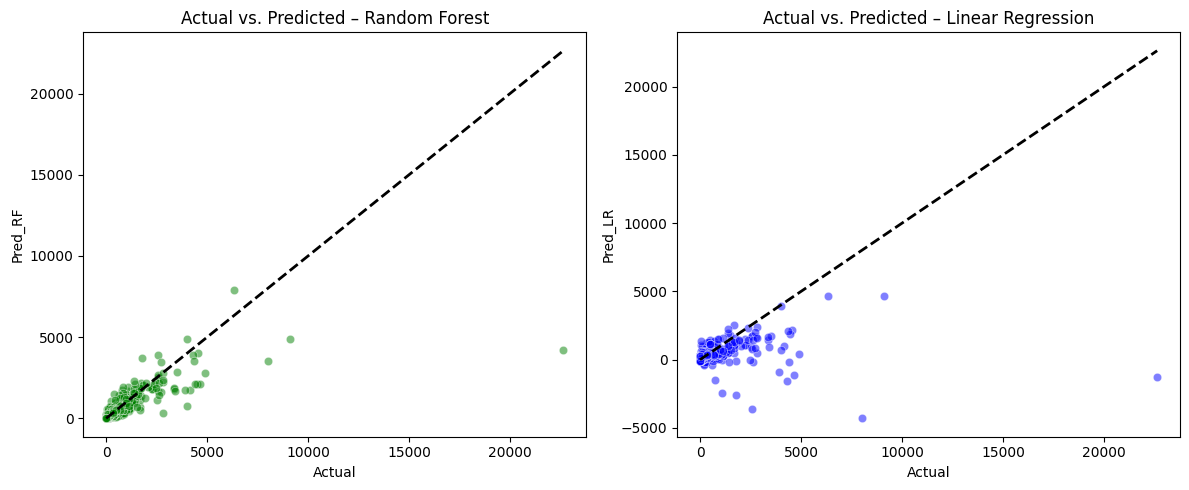

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Actual", y="Pred_RF", data=results_df, alpha=0.5, color="green")
plt.title("Actual vs. Predicted – Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Actual", y="Pred_LR", data=results_df, alpha=0.5, color="blue")
plt.title("Actual vs. Predicted – Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()


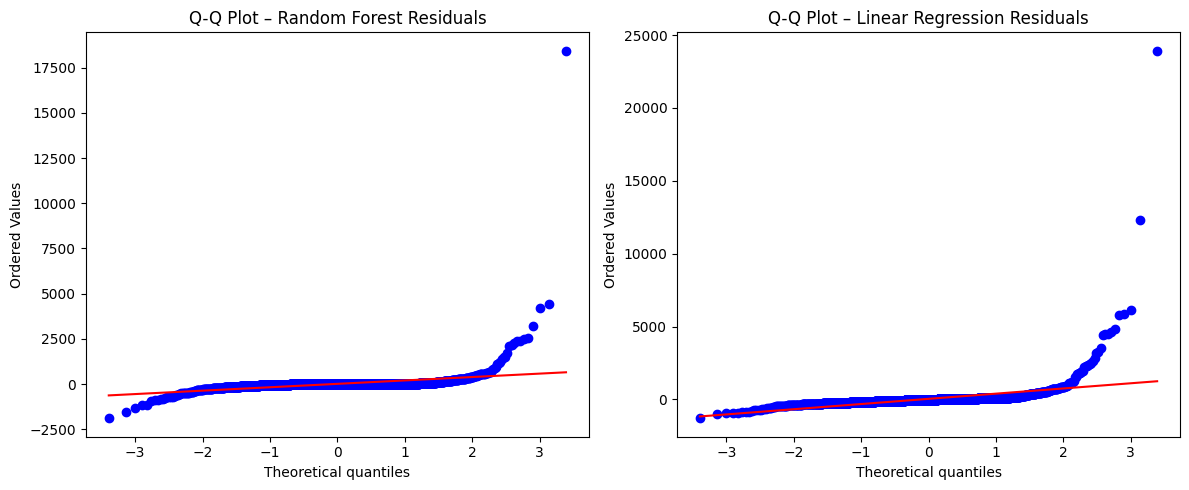

In [24]:
import scipy.stats as stats

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(results_df["Residual_RF"], dist="norm", plot=plt)
plt.title("Q-Q Plot – Random Forest Residuals")

plt.subplot(1, 2, 2)
stats.probplot(results_df["Residual_LR"], dist="norm", plot=plt)
plt.title("Q-Q Plot – Linear Regression Residuals")

plt.tight_layout()
plt.show()


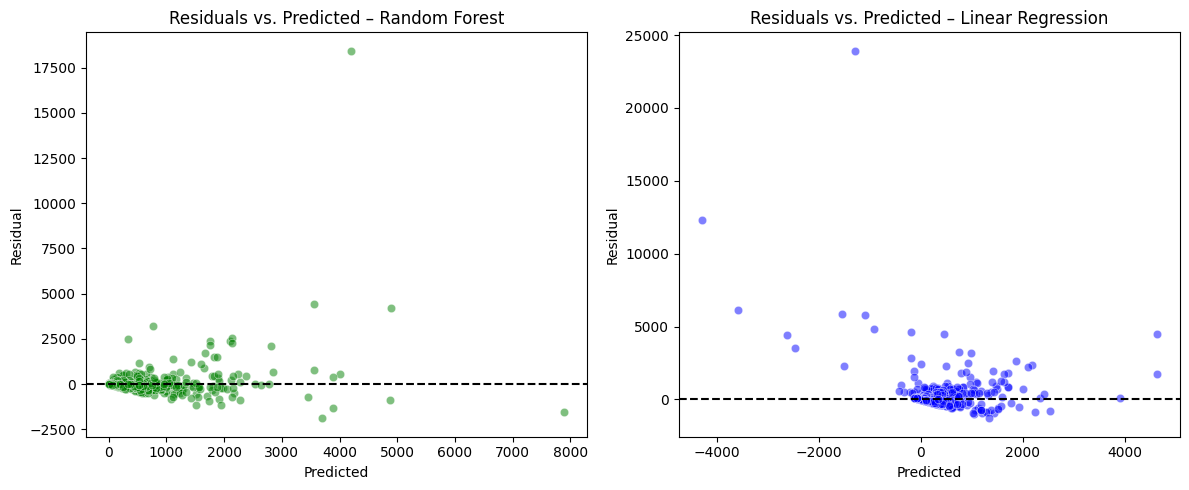

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=results_df["Pred_RF"], y=results_df["Residual_RF"], alpha=0.5, color="green")
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals vs. Predicted – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Residual")

plt.subplot(1, 2, 2)
sns.scatterplot(x=results_df["Pred_LR"], y=results_df["Residual_LR"], alpha=0.5, color="blue")
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals vs. Predicted – Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()


In [26]:
# 🧮 Create error DataFrame
error_df = X_test.copy()
error_df['Actual'] = y_test
error_df['Predicted'] = y_pred_rf
error_df['Absolute_Error'] = np.abs(error_df['Actual'] - error_df['Predicted'])

# 🔝 Select Top 10 errors
top_errors = error_df.sort_values(by='Absolute_Error', ascending=False).head(10)

# 💾 Save to CSV
top_error_path = ARTIFACTS_DIR / "top_rf_prediction_errors.csv"
top_errors.to_csv(top_error_path, index=False)
top_errors


,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Week,Order_Weekday,Shipping_Delay,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Actual,Predicted,Absolute_Error
2697,6,0.5,-1811.0784,2014,3,12,1,5,False,False,...,False,True,False,False,False,False,False,22638.480,4199.171380,18439.308620
683,4,0.5,-3839.9904,2017,11,44,5,0,True,False,...,False,True,False,False,False,False,False,7999.980,3556.928320,4443.051680
4277,7,0.0,2365.9818,2016,4,15,5,4,False,False,...,False,True,False,False,False,False,False,9099.930,4885.856980,4214.073020
6535,10,0.2,-50.0980,2014,11,47,0,5,False,False,...,False,False,False,False,False,False,False,4007.840,775.861613,3231.978387
1803,7,0.2,-1049.3406,2017,9,38,4,4,False,True,...,False,False,False,False,False,True,False,4663.736,2140.925552,2522.810448
8236,5,0.2,0.0000,2017,5,18,0,5,False,False,...,False,False,False,False,False,False,False,2803.920,329.302375,2474.617625
6014,8,0.2,363.9048,2016,3,10,3,1,False,False,...,False,False,False,True,False,False,False,4158.912,1748.348400,2410.563600
9165,4,0.2,503.6400,2016,6,25,4,2,False,True,...,False,True,False,False,False,False,False,4476.800,2095.296080,2381.503920
7243,9,0.3,-630.8820,2017,8,33,3,5,False,True,...,False,False,False,False,False,False,False,4416.174,2129.283414,2286.890586
5198,3,0.2,-786.0144,2016,3,9,3,5,False,False,...,False,False,False,False,False,True,False,3930.072,1750.722528,2179.349472


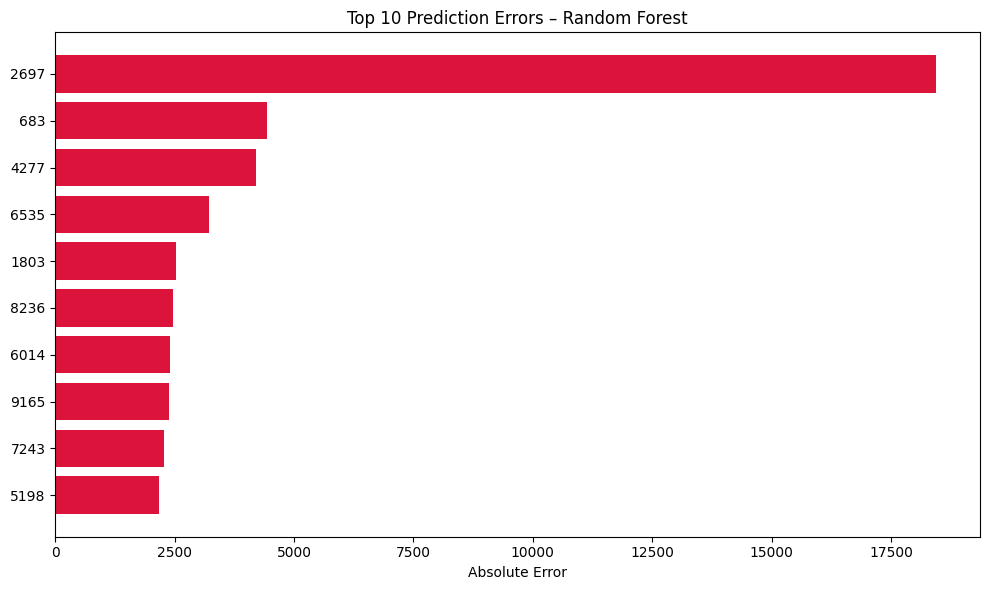

In [27]:
# 📈 Plot Top Errors
plt.figure(figsize=(10, 6))
plt.barh(top_errors.index.astype(str), top_errors['Absolute_Error'], color='crimson')
plt.xlabel("Absolute Error")
plt.title("Top 10 Prediction Errors – Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()

# 📁 Save Plot
error_plot_path = ARTIFACTS_DIR / "top_rf_prediction_errors_plot.png"
plt.savefig(error_plot_path, dpi=300)
plt.show()